# **Big Mart Sales Prediction**





In [1]:
!pip install catboost
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Loading of training and testing data
train_data = pd.read_csv(r'/content/train_v9rqX0R.csv')
test_data = pd.read_csv(r'/content/test_AbJTz2l.csv')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


# **Exploratory Data Analysis**

In [2]:
# This cell displays a random sample of rows from the dataset: train_data
# to get an overview of the data structure and values.
train_data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1282,DRG51,12.100,Low Fat,0.011605,Dairy,166.0526,OUT017,2007,NaN,Tier 2,Supermarket Type1,1480.0734
4673,FDG50,7.405,Low Fat,0.015358,Canned,92.4146,OUT017,2007,NaN,Tier 2,Supermarket Type1,1459.4336
1876,DRA59,8.270,Regular,0.127928,Soft Drinks,184.8924,OUT046,1997,Small,Tier 1,Supermarket Type1,4442.2176
579,NCV42,6.260,Low Fat,0.031471,Household,110.2228,OUT049,1999,Medium,Tier 1,Supermarket Type1,1547.3192
3150,DRE15,13.350,Low Fat,0.017821,Dairy,75.1012,OUT045,2002,NaN,Tier 2,Supermarket Type1,1366.2216
7199,FDU32,8.785,Low Fat,0.025968,Fruits and Vegetables,119.9414,OUT046,1997,Small,Tier 1,Supermarket Type1,1462.0968
142,NCO55,12.800,Low Fat,0.091222,Others,105.5938,OUT045,2002,NaN,Tier 2,Supermarket Type1,2143.8760
507,NCX29,10.000,LF,0.089657,Health and Hygiene,144.0102,OUT017,2007,NaN,Tier 2,Supermarket Type1,1603.9122
8334,FDW59,13.150,Low Fat,0.020699,Breads,86.3566,OUT013,1987,High,Tier 3,Supermarket Type1,1099.2358
5707,FDR49,8.710,Low Fat,0.139796,Canned,47.2376,OUT018,2009,Medium,Tier 3,Supermarket Type2,910.8144


In [3]:
# This cell displays a random sample of rows from the dataset : test_data
# to get an overview of the data structure and values.
test_data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1158,DRH49,19.700,Low Fat,0.024651,Soft Drinks,83.6592,OUT035,2004,Small,Tier 2,Supermarket Type1
700,FDV25,5.905,LF,0.045652,Canned,221.0456,OUT046,1997,Small,Tier 1,Supermarket Type1
3238,FDP46,NaN,Low Fat,0.074254,Snack Foods,91.0830,OUT027,1985,Medium,Tier 3,Supermarket Type3
627,FDB60,9.300,Low Fat,0.028580,Baking Goods,195.9136,OUT045,2002,NaN,Tier 2,Supermarket Type1
1255,FDW55,12.600,Regular,0.022014,Fruits and Vegetables,248.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1
2633,FDS08,5.735,Low Fat,0.057077,Fruits and Vegetables,175.7370,OUT045,2002,NaN,Tier 2,Supermarket Type1
533,FDA51,8.050,Regular,0.165611,Dairy,114.2518,OUT017,2007,NaN,Tier 2,Supermarket Type1
749,FDT45,15.850,Low Fat,0.057638,Snack Foods,55.0956,OUT017,2007,NaN,Tier 2,Supermarket Type1
1703,FDA19,7.520,Low Fat,0.055439,Fruits and Vegetables,130.0994,OUT017,2007,NaN,Tier 2,Supermarket Type1
127,FDW23,5.765,Low Fat,0.082346,Baking Goods,38.8164,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [4]:
#finding the shape of data and test:
print(train_data.shape[0],train_data.shape[1])
print(test_data.shape[0],test_data.shape[1])

8523 12
5681 11


In [5]:
#finding the training data's missing values
train_data.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [6]:
# This cell checks for missing values in the test data
# by counting null entries in each column.
test_data.isna().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [7]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
# Combining train and test data for preprocessing
# This cell merges the training and test datasets for unified preprocessing,
# adding a 'source' column to differentiate between them.

train_data['source'] = 'train'
test_data['source'] = 'test'
data = pd.concat([train_data, test_data], ignore_index=True)

In [12]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [14]:
data.isna().sum()

,0
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


In [15]:
# This cell randomly samples 10 unique item identifiers from the dataset,
# providing insight into the frequency of different item identifiers.
data['Item_Identifier'].value_counts().sample(10)

,count
Item_Identifier,
FDR25,8
FDX43,10
FDZ32,9
NCP54,8
FDA23,9
NCK30,9
FDV32,9
FDZ36,10
FDT46,10


In [16]:
# this code line finds the item_identifier column's unique number of values
data.Item_Identifier.nunique()

1559

In [17]:
#To identify categorical columns
# This cell identifies categorical columns within the dataset,
# excluding 'Item_Identifier' as it is treated differently.

data_cat=data.select_dtypes(include='object')
data_cat.drop(['Item_Identifier'],axis=1,inplace=True)
data_cat.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [18]:
# similarily identifying numerical columns:

data_num=data.select_dtypes(include=['int64','float64'])
list(data_num.columns)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

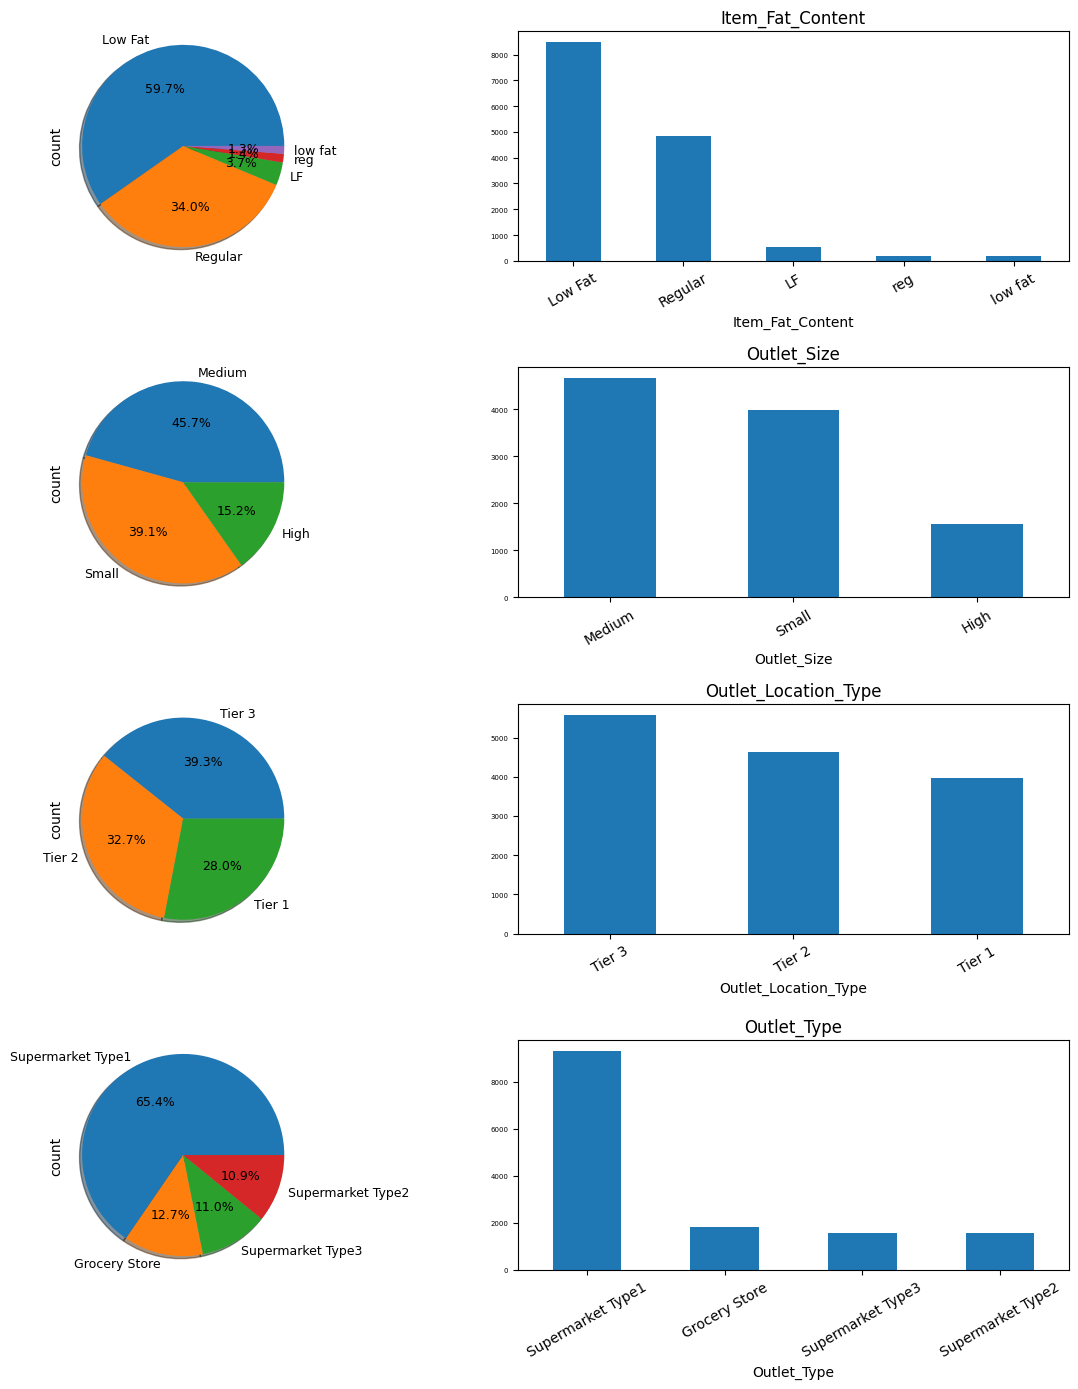

In [19]:
# This cell initializes subplots to visualize distributions of categorical columns.
# It sets up a grid layout to display the data for easy comparison too.
import matplotlib.pyplot as plt

cat_col_1 = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
fig, axes = plt.subplots(len(cat_col_1), 2, figsize=(12, 14))  # Create a grid of subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

count = 0
for cols in cat_col_1:
    # Pie chart
    data[cols].value_counts().plot.pie(ax=axes[count], shadow=True, autopct='%1.1f%%', radius=1.1, textprops={'fontsize': 9})
    count += 1

    # Bar chart
    data[cols].value_counts().plot.bar(ax=axes[count])
    axes[count].set_title('{0}'.format(cols))
    axes[count].tick_params(axis='x', labelsize=10, rotation=30)
    axes[count].tick_params(axis='y', labelsize=5)
    count += 1

plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.show()

In [20]:
# Identify continuous (numerical) columns
data_cont = data.select_dtypes(include=['float64', 'int64'])
data_cont.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

<ipython-input-21-5f7ac16c0a86>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["Item_Weight"]))


<Axes: xlabel='Item_Weight', ylabel='Density'>

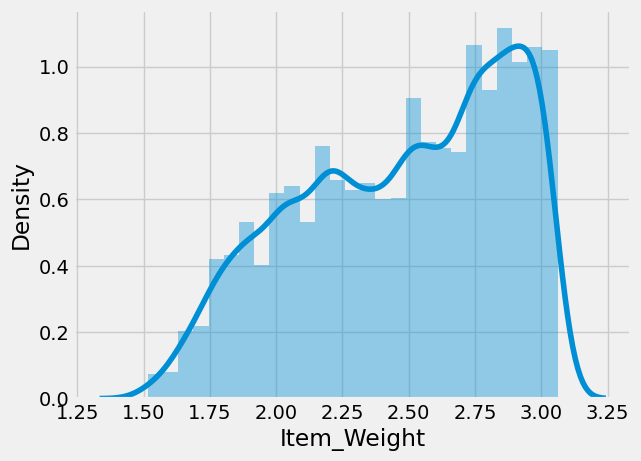

In [21]:
# This cell creates a distribution plot for 'Item_Weight' (after logarithmic transformation) using seaborn,
# which helps normalize the distribution for better modeling.
sns.distplot(np.log(data["Item_Weight"]))

<Axes: xlabel='Item_Visibility', ylabel='Count'>

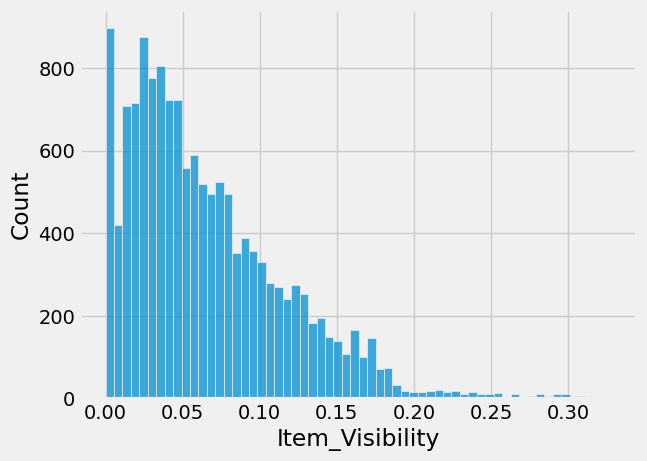

In [22]:
# This cell creates a histogram for 'Item_Visibility' to understand its distribution across items.
# This cell uses seaborn to create a histogram of 'Item_Visibility',
# allowing us to observe its original distribution across items.
sns.histplot(data["Item_Visibility"])

<ipython-input-23-4857c1543c4a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["Item_MRP"]))


<Axes: xlabel='Item_MRP', ylabel='Density'>

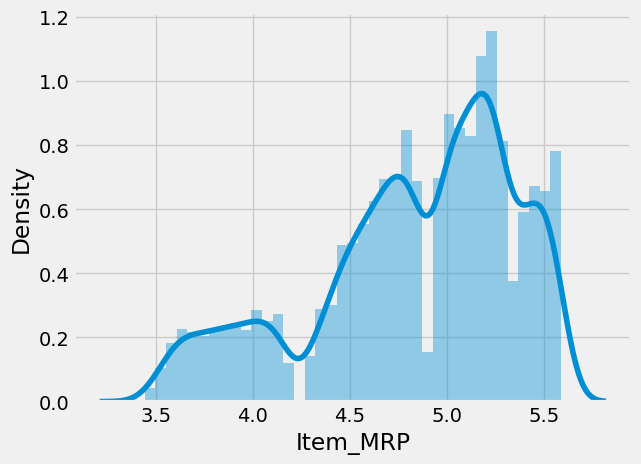

In [23]:
# This cell plots the distribution of 'Item_MRP' (after applying logarithmic transformation) for normalization.
# This cell uses seaborn to plot the distribution of 'Item_MRP' after log transformation,
# which helps normalize and visualize its distribution for better interpretability.

sns.distplot(np.log(data["Item_MRP"]))

<Axes: xlabel='Item_MRP', ylabel='Count'>

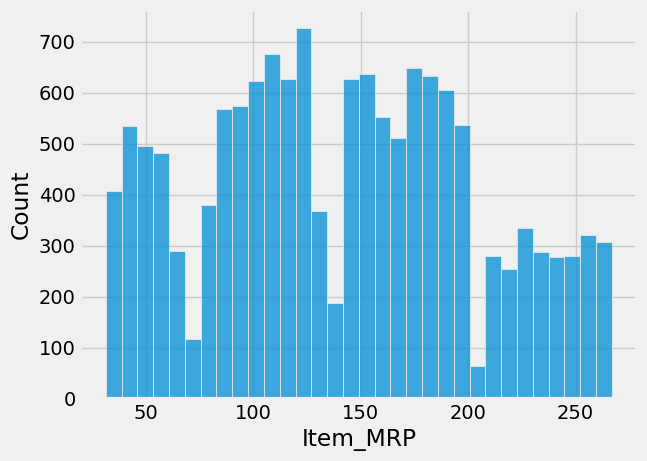

In [24]:
# This cell plots a histogram of 'Item_MRP' without transformations, showing its original distribution.
# This cell uses seaborn to plot the original distribution of 'Item_MRP',
# giving a sense of the raw price distribution across items.

sns.histplot(data["Item_MRP"])

<ipython-input-25-a94768e678bf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["Item_Outlet_Sales"]))


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

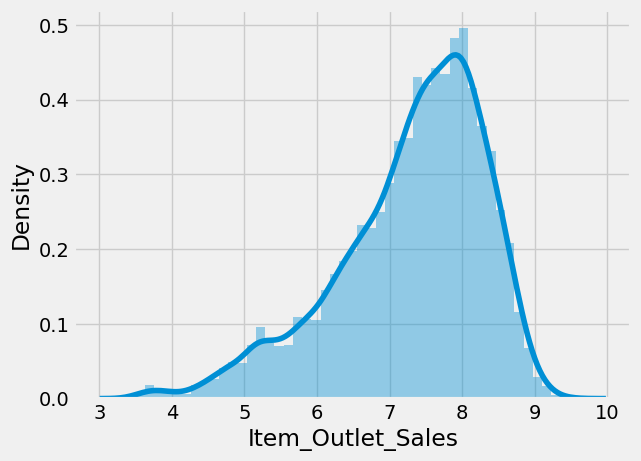

In [25]:
# This cell uses seaborn to plot the distribution of 'Item_Outlet_Sales' (log-transformed),
# helping to normalize the sales data for better modeling.

sns.distplot(np.log(data["Item_Outlet_Sales"]))

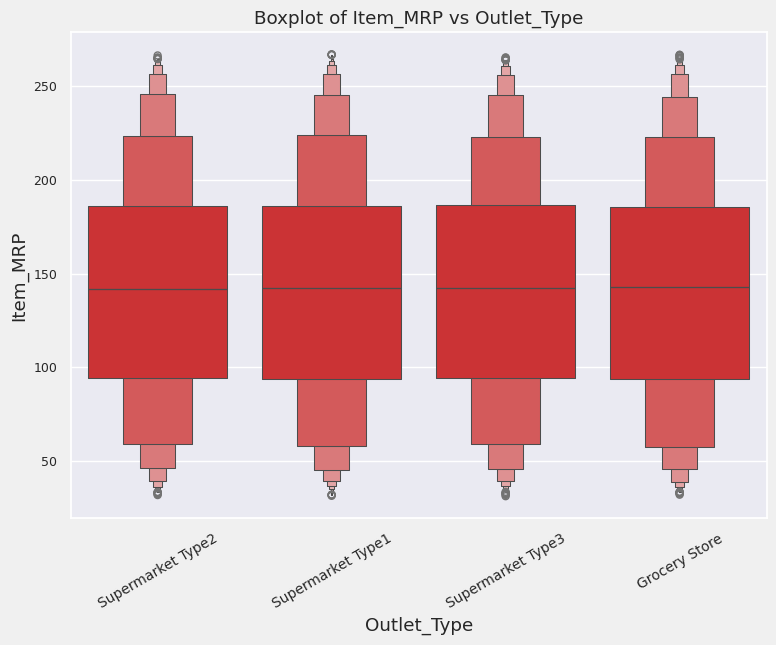

In [26]:
# This cell uses seaborn to plot a boxen plot for 'Item_MRP' against 'Outlet_Type',
# showing the price distribution by outlet type, which highlights central tendency and spread.
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid', palette="Set1", font_scale=1.1)

# Sort by median of 'Item_MRP' grouped by 'Outlet_Type'
sorted_nb = data.groupby('Outlet_Type')['Item_MRP'].median().sort_values()

# Plot the boxen plot
sns.boxenplot(x='Outlet_Type', y='Item_MRP', data=data, order=sorted_nb.index)
plt.title('Boxplot of Item_MRP vs Outlet_Type')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_MRP')
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=9)
plt.show()


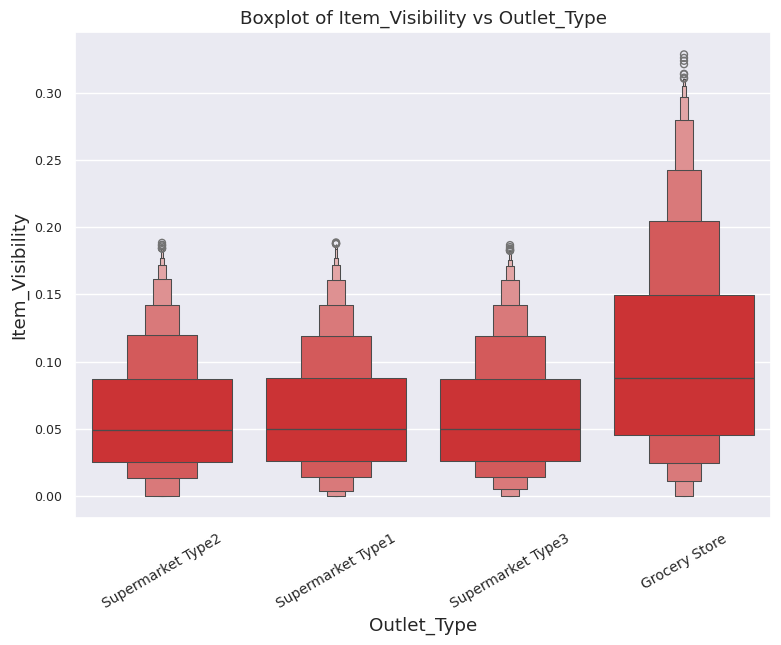

In [27]:
# This cell uses seaborn to plot a boxen plot of 'Item_Visibility' against 'Outlet_Type',
# showing visibility distribution across different outlet types.
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid', palette="Set1", font_scale=1.1)

# Sort by median of 'Item_Visibility' grouped by 'Outlet_Type'
sorted_nb = data.groupby('Outlet_Type')['Item_Visibility'].median().sort_values()

# Plot the boxen plot
sns.boxenplot(x='Outlet_Type', y='Item_Visibility', data=data, order=sorted_nb.index)
plt.title('Boxplot of Item_Visibility vs Outlet_Type')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Visibility')
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=9)
plt.show()


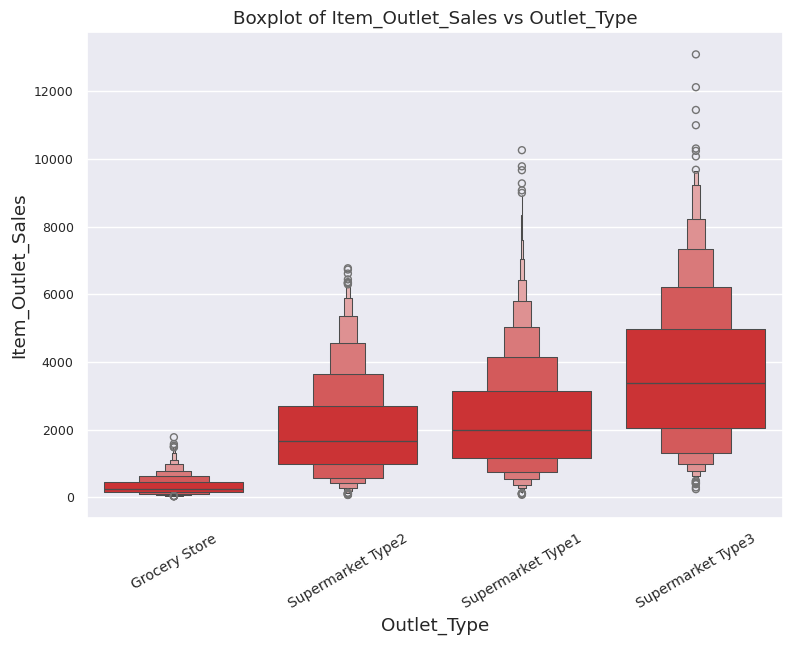

In [28]:
# This cell uses seaborn to create a boxen plot of 'Item_Outlet_Sales' across 'Outlet_Type',
# helping to analyze sales patterns by outlet type.
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid', palette="Set1", font_scale=1.1)

# Sort by median of 'Item_Outlet_Sales' grouped by 'Outlet_Type'
sorted_nb = data.groupby('Outlet_Type')['Item_Outlet_Sales'].median().sort_values()

# Plot the boxen plot
sns.boxenplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, order=sorted_nb.index)
plt.title('Boxplot of Item_Outlet_Sales vs Outlet_Type')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=9)
plt.show()



In [29]:
# Counts duplicate values in Outlet_Type
print(data['Outlet_Type'].duplicated().sum())

14200


In [30]:
pd.crosstab(data.Outlet_Type.fillna("Missing"),data.Item_Outlet_Sales)

Item_Outlet_Sales,33.2900,33.9558,34.6216,35.2874,36.6190,37.2848,37.9506,38.6164,39.9480,40.6138,...,9678.0688,9779.9362,10072.8882,10236.6750,10256.6490,10306.5840,10993.6896,11445.1020,12117.5600,13086.9648
Outlet_Type,,,,,,,,,,,,,,,,,,,,,
Grocery Store,2,1,1,1,2,1,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
Supermarket Type1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
Supermarket Type2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Supermarket Type3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,1


In [31]:
# This cell calculates the count of missing values for each column in the dataset,
# helping identify which features require data cleaning or imputation.
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


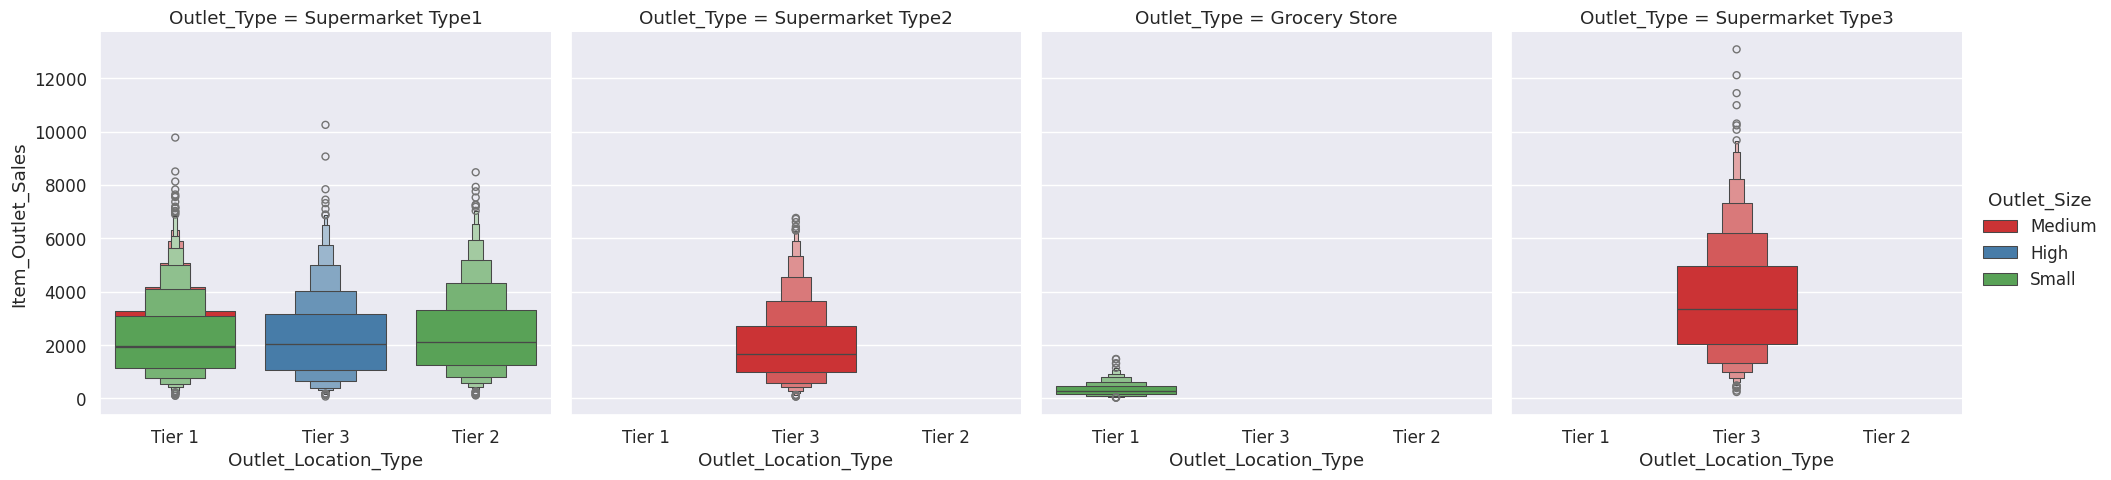

In [32]:
# This cell creates a seaborn catplot to visualize the distribution of 'Item_Outlet_Sales'
# across different 'Outlet_Location_Type' and 'Outlet_Type' categories, with 'Outlet_Size' as a hue for further segmentation.
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',kind='boxen',data=data,col='Outlet_Type',hue='Outlet_Size',palette="Set1")

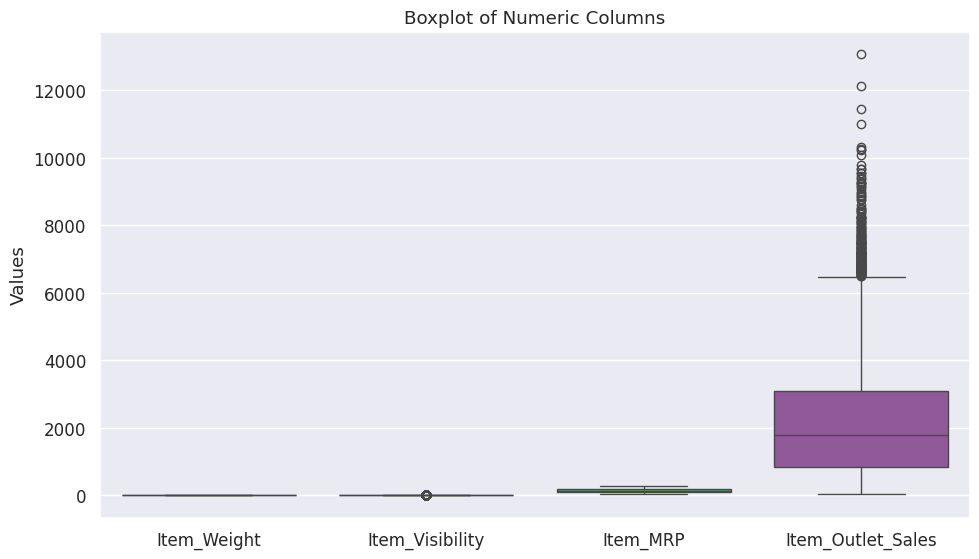

In [33]:
# This cell generates a boxplot for selected numeric columns to observe their distribution,
# outliers, and central tendency within the dataset.

numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=data[numeric_columns])

# Add title and labels
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

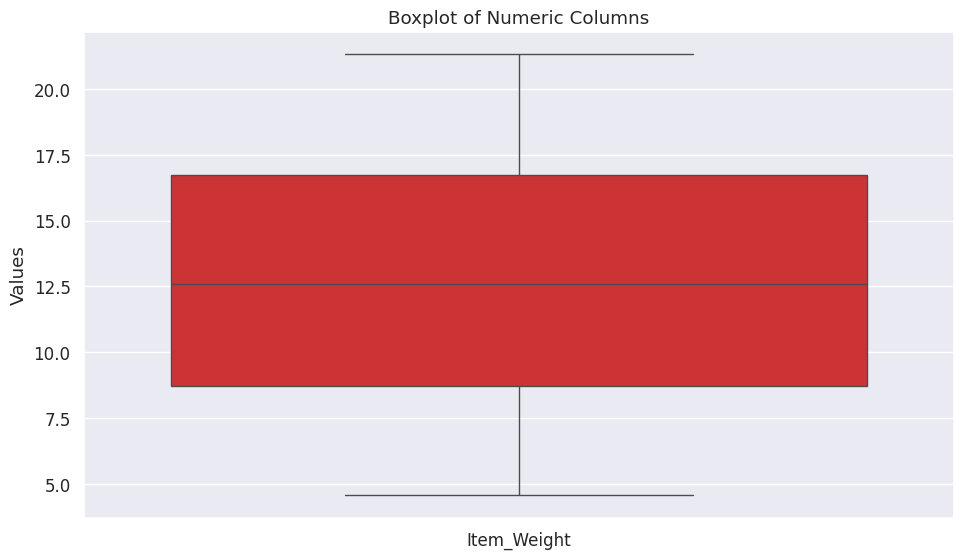

In [34]:
# This cell plots a boxplot for 'Item_Weight' to analyze its distribution and detect any potential outliers.
numeric_columns = ['Item_Weight']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=data[numeric_columns])

# Add title and labels
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

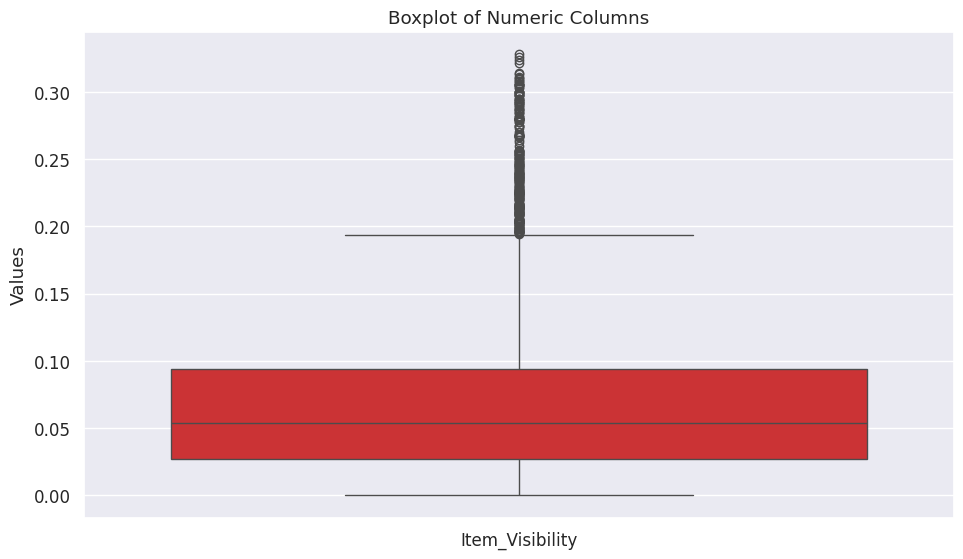

In [35]:
# This cell plots a boxplot for 'Item_Visibility', useful for identifying outliers and understanding its range.
numeric_columns = ['Item_Visibility']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=data[numeric_columns])

# Add title and labels
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

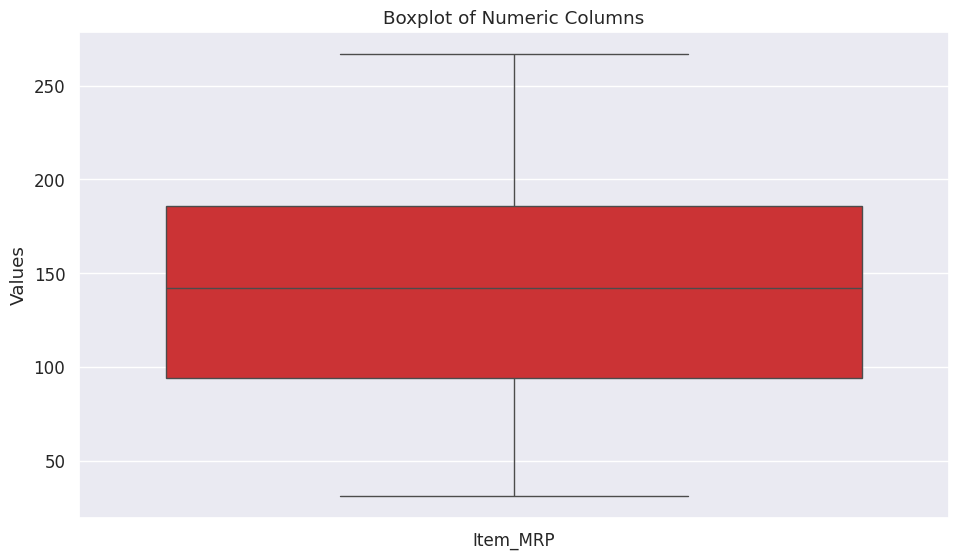

In [36]:
# This cell plots a boxplot for 'Item_MRP', helping to visualize its distribution and detect any outliers.
numeric_columns = ['Item_MRP']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=data[numeric_columns])

# Add title and labels
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

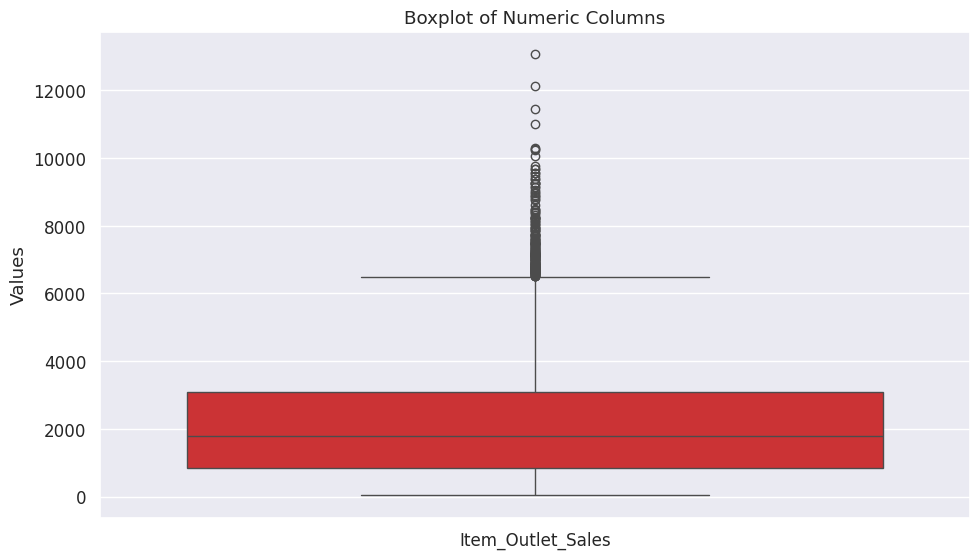

In [37]:
# This cell plots a boxplot for 'Item_Outlet_Sales', offering insight into the sales distribution and potential outliers.
numeric_columns = ['Item_Outlet_Sales']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=data[numeric_columns])

# Add title and labels
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

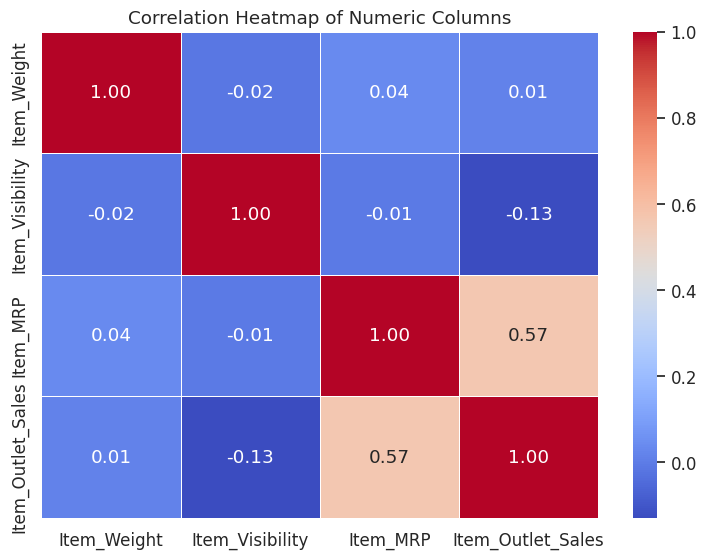

In [38]:
# This cell generates a correlation heatmap for the numeric columns to show relationships between features,
# useful for feature selection and identifying multicollinearity.

df1 = pd.DataFrame(data)

# List of numeric columns
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Calculate the correlation matrix for the numeric columns
corr_matrix = df1[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numeric Columns')

# Display the heatmap
plt.show()

In [39]:
# This cell uses binning to categorize 'Item_Weight' into discrete bins ('Low', 'Medium', 'High'),
# simplifying the data for further analysis, like categorical modeling.
import scipy.stats as stats

df1 = pd.DataFrame(data)

# Step 1: Discretize 'Item_Weight' into bins (for example, 'Low', 'Medium', 'High')
bins = [4.555000, 8.710000, 12.600000, 16.750000]
labels = ['Low', 'Medium', 'High']
data['Item_Weight_Bin'] = pd.cut(data['Item_Weight'], bins=bins, labels=labels)

# Step 2: Construct contingency tables for Item_Weight_Bin and Item_Fat_Content
contingency_fat_content = pd.crosstab(data['Item_Weight_Bin'], data['Item_Fat_Content'])

# Step 3: Perform the Chi-Square Test of Independence between Item_Weight_Bin and Item_Fat_Content
chi2_fat_content, p_fat_content, dof_fat_content, expected_fat_content = stats.chi2_contingency(contingency_fat_content)

print("Chi-Square Test between Item_Weight and Item_Fat_Content")
print(f"Chi-Square Statistic: {chi2_fat_content}")
print(f"P-Value: {p_fat_content}")
print(f"Degrees of Freedom: {dof_fat_content}")
print(f"Expected Frequencies:\n{expected_fat_content}")
print("-" * 50)

# Step 4: Construct contingency tables for Item_Weight_Bin and Item_Type
contingency_item_type = pd.crosstab(data['Item_Weight_Bin'], data['Item_Type'])

# Step 5: Perform the Chi-Square Test of Independence between Item_Weight_Bin and Item_Type
chi2_item_type, p_item_type, dof_item_type, expected_item_type = stats.chi2_contingency(contingency_item_type)

print("Chi-Square Test between Item_Weight and Item_Type")
print(f"Chi-Square Statistic: {chi2_item_type}")
print(f"P-Value: {p_item_type}")
print(f"Degrees of Freedom: {dof_item_type}")
print(f"Expected Frequencies:\n{expected_item_type}")

Chi-Square Test between Item_Weight and Item_Fat_Content
Chi-Square Statistic: 7.532459281445902
P-Value: 0.48041820191197004
Degrees of Freedom: 8
Expected Frequencies:
[[ 107.41821057 1737.70639404 1028.14572978   35.69487122   44.0347944 ]
 [ 109.70989607 1774.77903299 1050.0804338    36.45639404   44.97424311]
 [ 104.87189336 1696.51457298 1003.77383642   34.84873475   42.99096249]]
--------------------------------------------------
Chi-Square Test between Item_Weight and Item_Type
Chi-Square Statistic: 195.90968367442224
P-Value: 2.8763939371726344e-26
Degrees of Freedom: 30
Expected Frequencies:
[[239.52259376  97.07670583  35.02767736 236.85381835 225.51152282
  297.90205603 412.65939901  86.40160416 172.46961139 293.89889291
  152.12019883  53.04191143  15.34545865 408.65623588 170.80162675
   55.71068685]
 [244.6326254   99.14776322  35.77496611 241.90691369 230.32263895
  304.25756891 421.46317216  88.2449164  176.14911884 300.16900136
  155.3655671   54.17352011  15.6728423 

In [40]:
# from the above chi square test we can see that the relationship between item weight and item type is high. will visualize this ahead.
# we can assume that these 2 calumns are heavily related.
# we can know from business context that item_weight depends on item type and item fat content.
# this the missing value of item_weight should be filled by

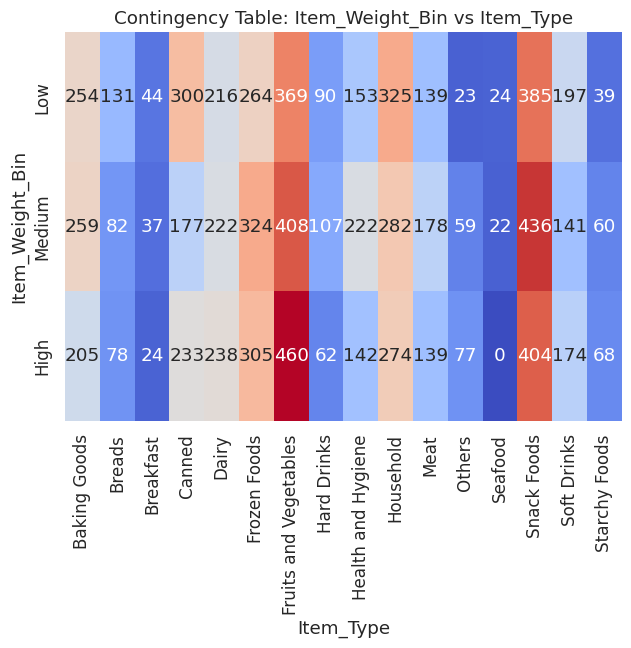

In [41]:
# This cell visualizes a contingency table between 'Item_Weight_Bin' and 'Item_Type' using a heatmap,
# providing insights into the relationship between weight categories and item types.

sns.heatmap(contingency_item_type, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Contingency Table: Item_Weight_Bin vs Item_Type")
plt.show()


# **Data Imputing and Data Modelling**

In [42]:

# Data Cleaning and Feature Engineering

# Fix inconsistent categories in 'Item_Fat_Content'
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Create a new feature: 'Outlet_Age'
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

# Impute missing 'Item_Weight' using mean weight per 'Item_Identifier'
item_weight_mean = data.pivot_table(values='Item_Weight', index='Item_Identifier')
missing_bool = data['Item_Weight'].isnull()
data.loc[missing_bool, 'Item_Weight'] = data.loc[missing_bool, 'Item_Identifier'].apply(lambda x: item_weight_mean.loc[x])

# Replace zeros in 'Item_Visibility' with median
data['Item_Visibility'].replace(0, data['Item_Visibility'].median(), inplace=True)

# This feature, 'Item_Visibility_MeanRatio', calculates the ratio of each item's visibility to its mean visibility across identifiers.
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility'] / visibility_avg.loc[x['Item_Identifier']], axis=1)

# Drop columns that won't be used
data.drop(['Item_Identifier', 'Outlet_Establishment_Year', 'source', 'Item_Weight_Bin'], axis=1, inplace=True)

# Specifying categorical features for the CatBoost model, ensuring correct handling of categorical data during training.
categorical_features = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type', 'Outlet_Identifier']
categorical_feature_indices = [data.columns.get_loc(col) for col in categorical_features]

# Convert categorical features to strings for CatBoost compatibility
for col in categorical_features:
    data[col] = data[col].astype(str)

# Split data back into train and test sets
train = data.loc[data['Item_Outlet_Sales'].notnull()]
test = data.loc[data['Item_Outlet_Sales'].isnull()].drop(['Item_Outlet_Sales'], axis=1)

# Features and target variable
X_train = train.drop(['Item_Outlet_Sales'], axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.copy()

# Create Pool objects for CatBoost with categorical feature indices
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_feature_indices)
test_pool = Pool(data=X_test, cat_features=categorical_feature_indices)

# Define parameter grid for tuning
param_grid = {
    'iterations': 1000,
    'learning_rate': 0.03,
    'depth': 8,
    'l2_leaf_reg': 3,
    'bagging_temperature': 0.4,
    'random_seed': 7,
    'loss_function': 'RMSE'
}

# Run CatBoost's cv function for cross-validation
cv_results = cv(
    params=param_grid,
    pool=train_pool,
    fold_count=5,
    early_stopping_rounds=50,
    plot=False
)

# Extract best iteration based on CV
best_iteration = len(cv_results['test-RMSE-mean'])
param_grid['iterations'] = best_iteration
print(f"Best iteration: {best_iteration}")

# Train final model with the best parameters and full dataset
final_model = CatBoostRegressor(**param_grid)
final_model.fit(train_pool)

# Make predictions on the test data
test_predictions = final_model.predict(test_pool)

# Save predictions to CSV
submission = pd.DataFrame({
    'Item_Identifier': test_data['Item_Identifier'],
    'Outlet_Identifier': test_data['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})
submission.to_csv('submission_catboost.csv', index=False)
print("Improved CatBoost model has been trained and submission file has been created.")

<ipython-input-42-0320b2130114>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Visibility'].replace(0, data['Item_Visibility'].median(), inplace=True)


Training on fold [0/5]
0:	learn: 2717.0466923	test: 2640.5970146	best: 2640.5970146 (0)	total: 72.9ms	remaining: 1m 12s
1:	learn: 2653.3480765	test: 2577.0223757	best: 2577.0223757 (1)	total: 96.9ms	remaining: 48.3s
2:	learn: 2591.0232017	test: 2514.3094729	best: 2514.3094729 (2)	total: 109ms	remaining: 36.1s
3:	learn: 2531.3404388	test: 2454.3757072	best: 2454.3757072 (3)	total: 127ms	remaining: 31.6s
4:	learn: 2471.8002418	test: 2395.4697190	best: 2395.4697190 (4)	total: 144ms	remaining: 28.6s
5:	learn: 2413.4629840	test: 2337.4671178	best: 2337.4671178 (5)	total: 153ms	remaining: 25.3s
6:	learn: 2360.4794577	test: 2284.2624285	best: 2284.2624285 (6)	total: 167ms	remaining: 23.7s
7:	learn: 2306.8390916	test: 2230.5637795	best: 2230.5637795 (7)	total: 180ms	remaining: 22.3s
8:	learn: 2255.5269423	test: 2179.5308040	best: 2179.5308040 (8)	total: 202ms	remaining: 22.3s
9:	learn: 2205.1595954	test: 2129.3070197	best: 2129.3070197 (9)	total: 222ms	remaining: 22s
10:	learn: 2158.6632426	te